# GEQIE QUALPI Example

## Setup

### Imports

In [1]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

In [ ]:
import geqie
from geqie.encodings import qualpi

## Encoding

### Opening the image

Opening the test image.

In [2]:
image = Image.open("../../assets/test_images/grayscale/test_flag_4x4.png")
image = ImageOps.grayscale(image)
image = np.asarray(image)
image

array([[255, 255, 255, 255],
       [128, 128, 128, 128],
       [128, 128, 128, 128],
       [  0,   0,   0,   0]], dtype=uint8)

## Please, note the fact, that you need to convert from polar to cartesian coordinate system.

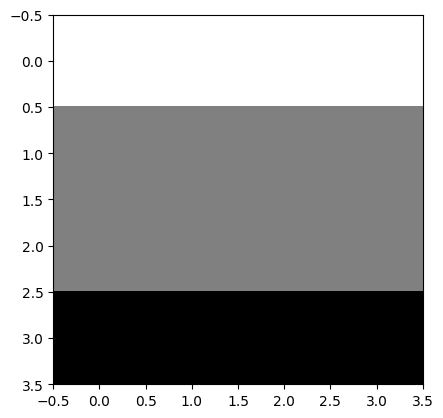

In [8]:
plt.imshow(image, cmap="gray")

### Encoding using unitary gate

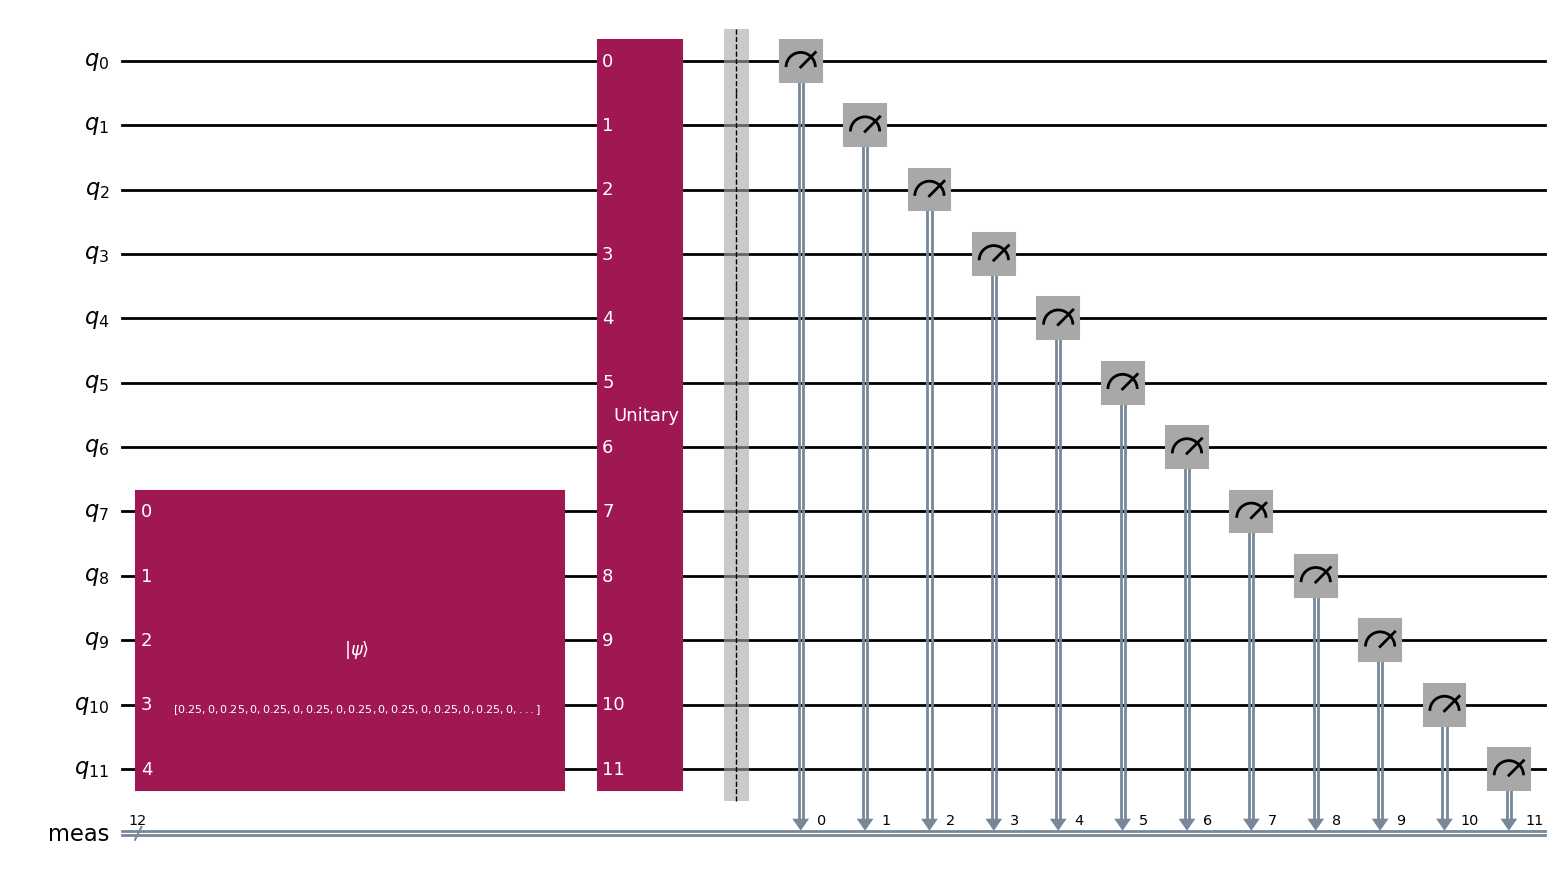

In [ ]:
circuit = geqie.encode(
    qualpi.init_function, qualpi.data_function, qualpi.map_function, image
)
circuit.draw(output="mpl")

### Simulating the circuit

In [5]:
result = geqie.simulate(circuit, 1000)
result

{'000011111111': 74,
 '101110000000': 64,
 '011010000000': 68,
 '100010000000': 68,
 '001111111111': 58,
 '011110000000': 60,
 '111000000000': 62,
 '110000000000': 52,
 '110100000000': 57,
 '010110000000': 65,
 '001011111111': 64,
 '100110000000': 59,
 '101010000000': 62,
 '000111111111': 60,
 '010010000000': 61,
 '111100000000': 66}

## Interpretation of the results

Total state $\ket{\psi}$ is equal to:
$$\ket{\psi} = \ket{\theta}\otimes\ket{\rho}\otimes\ket{color}^{\otimes 8}$$
Where:
- $\rho = \log_{\text{base}} \sqrt{(x - x_c)^2 + (y - y_c)^2}$,
- $\theta = \tan^{-1} \frac{y - y_c}{x - x_c}$,
- $x_c$, and $y_c$ correspond to central pixel possition;
- Last 8 qubits corresponds to color intensity, for example: $77 = \ket{01001101}$ (corresponds to $2^6+2^3+2^2+2^0$).

In [6]:
reconstructed_image = np.zeros_like(image)
x_range = int(np.ceil(np.log2(image.shape[0])))
y_range = int(np.ceil(np.log2(image.shape[1])))

for state, n in result.items():
    if n > 0:
        x = state[0:2]  # [0:x_range]
        y = state[2:4]  # [x_range:x_range+y_range]

        c = state[4:12]  # [x_range+y_range:x_range+y_range+8]

        x_dec = int(x, base=2)
        y_dec = int(y, base=2)
        c_dec = int(c, base=2)
        reconstructed_image[x_dec, y_dec] = c_dec


print("Original image:")
print(image)
print("Reconstructed image:")
print(reconstructed_image)

Original image:
[[255 255 255 255]
 [128 128 128 128]
 [128 128 128 128]
 [  0   0   0   0]]
Reconstructed image:
[[255 255 255 255]
 [128 128 128 128]
 [128 128 128 128]
 [  0   0   0   0]]


### Reconstructed image

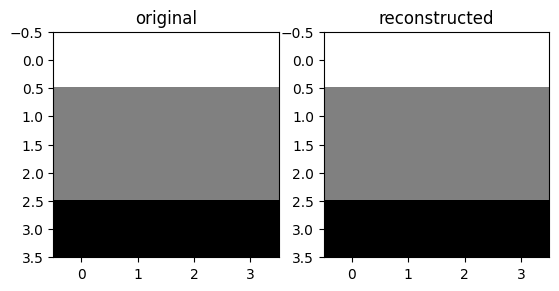

In [9]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image, cmap="gray")

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(reconstructed_image, cmap="gray")